In [1]:
!pip install -q -U "tensorflow-text==2.8.*"

     |████████████████████████████████| 4.9 MB 5.3 MB/s 
     |████████████████████████████████| 497.9 MB 32 kB/s 
     |████████████████████████████████| 5.8 MB 44.5 MB/s 
     |████████████████████████████████| 462 kB 52.7 MB/s 
     |████████████████████████████████| 1.4 MB 43.6 MB/s 


In [2]:
!pip install -q tf-models-official==2.7.0

     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 1.1 MB 42.9 MB/s 
     |████████████████████████████████| 1.3 MB 50.0 MB/s 
     |████████████████████████████████| 99 kB 1.9 MB/s 
     |████████████████████████████████| 118 kB 4.5 MB/s 
     |████████████████████████████████| 43 kB 1.4 MB/s 
     |████████████████████████████████| 352 kB 32.8 MB/s 
     |████████████████████████████████| 238 kB 22.0 MB/s 


<h1> Imports </h1>

In [3]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

from official.nlp import optimization  # to create AdamW optimizer

import pandas as pd

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


<h1> Datasets </h1>

In [5]:
path_fake_news = '/content/gdrive/MyDrive/ai-playground/ra-text-classification-spectrogram/datasets/Fake.csv'
path_true_news = '/content/gdrive/MyDrive/ai-playground/ra-text-classification-spectrogram/datasets/True.csv'

In [6]:
df_fake_news = pd.read_csv(path_fake_news)
df_true_news = pd.read_csv(path_true_news)

In [7]:
df_fake_news['category'] = 0
df_true_news['category'] = 1

In [8]:
df = pd.concat([df_true_news, df_fake_news])

In [9]:
df['text'] = df['text'] + ' ' + df['title']

In [10]:
del df['title']
del df['subject']
del df['date']

In [11]:
df.shape

(44898, 2)

In [12]:
mask = (df['text'].str.len() >= 4000)
df4000 = df.loc[mask]

In [13]:
df4000.groupby('category').describe()

text                                                               
         count unique                                                top freq
category                                                                     
0         3054   1999  Dr. Gina Loudon is hands down one of our favor...    3
1         3675   3614  WASHINGTON (Reuters) - The U.S. Senate on Thur...    2

In [14]:
df4000_unique = df4000.drop_duplicates()

In [15]:
df4000_unique.groupby('category').describe()

text                                                               
         count unique                                                top freq
category                                                                     
0         1999   1999  All Senator John McCain wanted to achieve on t...    1
1         3614   3614  WASHINGTON (Reuters) - The head of a conservat...    1

In [16]:
df4000_true = df4000_unique[df4000_unique['category'] == 1]
df4000_fake = df4000_unique[df4000_unique['category'] == 0]

In [17]:
df4000_true_downsampled = df4000_true.sample(df4000_fake.shape[0])

In [18]:
df4000_balanced = pd.concat([df4000_fake, df4000_true_downsampled])
df4000_balanced.groupby('category').describe()

text                                                               
         count unique                                                top freq
category                                                                     
0         1999   1999  All Senator John McCain wanted to achieve on t...    1
1         1999   1999  CHARLESTON, S.C. (Reuters) - Before Donald Tru...    1

In [19]:
df4000_balanced.shape

(3998, 2)

In [20]:
bert_model_name = 'bert_en_uncased_L-12_H-768_A-12' 
tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3'
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

In [21]:
bert_preprocess = hub.KerasLayer(tfhub_handle_preprocess) 
bert_encoder = hub.KerasLayer(tfhub_handle_encoder)

In [22]:
df4000_balanced_true = df4000_balanced.loc[df4000_balanced['category'] == 1]
df4000_balanced_true.shape[0]

1999

In [23]:
df4000_balanced_false = df4000_balanced.loc[df4000_balanced['category'] == 0]
df4000_balanced_false.shape[0]

1999

In [24]:
df4000_balanced_true_list = df4000_balanced_true['text'].tolist()
df4000_balanced_false_list = df4000_balanced_false['text'].tolist()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=1).
  # Remove the CWD from sys.path while we load stuff.


KeyboardInterrupt: ignored

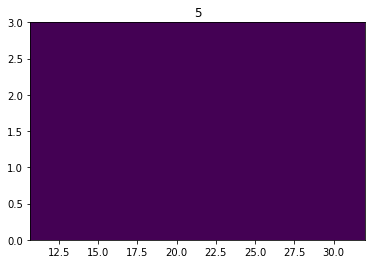

In [25]:
# idx = 0
# trueimagespectrogramdirectory = '/content/gdrive/MyDrive/ai-playground/ra-text-classification-spectrogram/images/isot4000bertspectrograms/true'

# for text in df4000_balanced_true_list:
#   df4000_balanced_true_preprocessed_text = bert_preprocess([text])
#   df4000_balanced_true_bert_vector = bert_encoder(df4000_balanced_true_preprocessed_text)['pooled_output']

#   idx += 1

#   plt.specgram(df4000_balanced_true_bert_vector, Fs = 6, scale = 'linear')
#   plt.rcParams["figure.figsize"] = (50,15)
#   plt.title(idx)
#   plt.savefig(f'{trueimagespectrogramdirectory}/{idx}.png')

#   if idx == 10:
#     break

In [ ]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 250 kB 5.1 MB/s 
     |████████████████████████████████| 1.9 MB 28.4 MB/s 
     |████████████████████████████████| 5.3 MB 32.2 MB/s 
     |████████████████████████████████| 441 kB 23.7 MB/s 
     |████████████████████████████████| 7.6 MB 29.4 MB/s 
     |████████████████████████████████| 9.2 MB 25.7 MB/s 
     |████████████████████████████████| 163 kB 60.4 MB/s 
     |████████████████████████████████| 182 kB 39.7 MB/s 
     |████████████████████████████████| 162 kB 26.4 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 162 kB 70.8 MB/s 
     |████████████████████████████████| 158 kB 49.6 MB/s 
     |████████████████████████████████| 157 kB 48.4 MB/s 
     |████████████████████████████████| 157 kB 52.7 MB/s 
     |████████████████████████████████| 157 kB 51.0 MB/s 
     |████████████████████████████

In [ ]:
from simpletransformers.language_representation import RepresentationModel

model = RepresentationModel(
    model_type='bert',
    model_name='bert-base-uncased',
    use_cuda = False,
)

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTextRepresentation: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTextRepresentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTextRepresentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=1).
  import sys


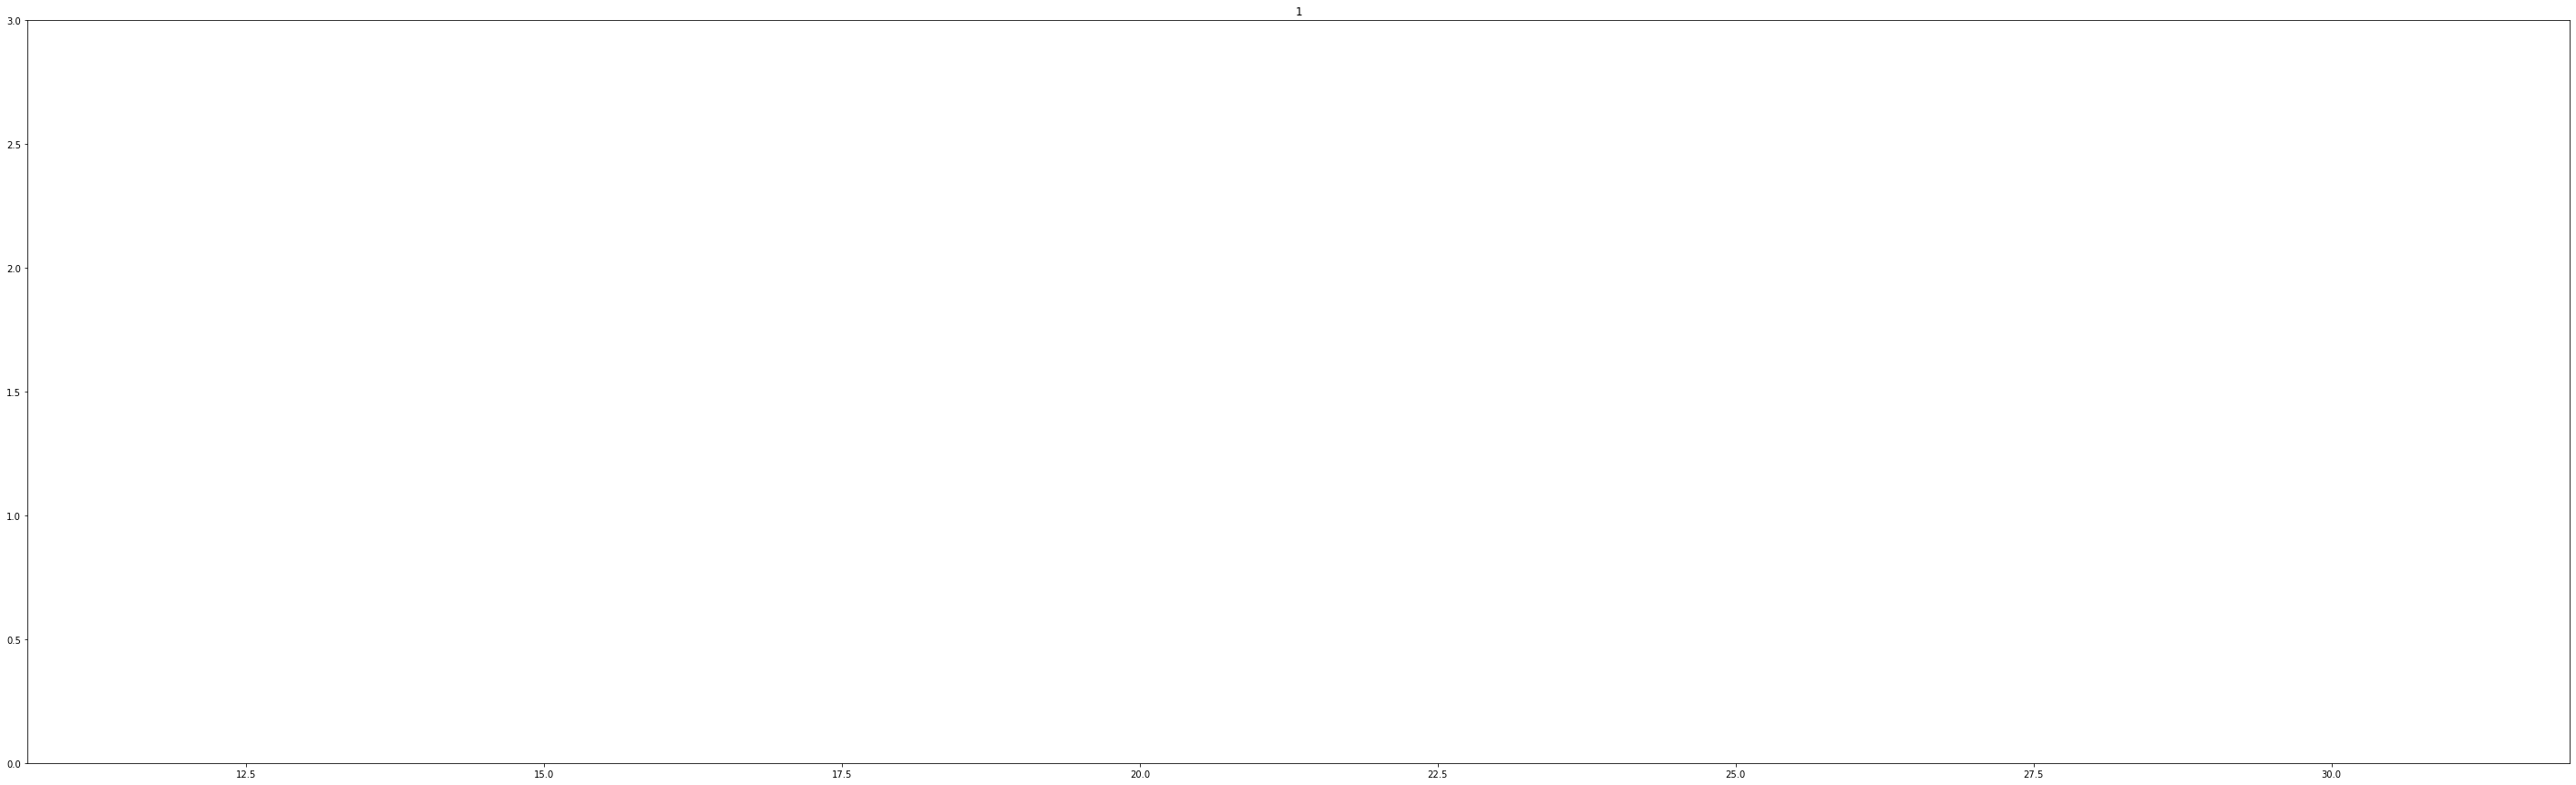

In [ ]:
idx = 0
for text in df4000_balanced_true_list:
  simpletransformers_true_vector = model.encode_sentences([text], combine_strategy='mean')

  idx += 1

  plt.specgram(simpletransformers_true_vector, Fs = 6)
  plt.rcParams["figure.figsize"] = (50,15)
  plt.title(idx)
  plt.savefig(f'{trueimagespectrogramdirectory}/{idx}.png')

  break